In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast #Abstract Syntax Trees
import plotly.graph_objects as go #pip install plotly 
from wordcloud import WordCloud, STOPWORDS #pip install wordcloud
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from datetime import date

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score

## Movie Metadata Analysis and Recommendation System

In [2]:
data = pd.read_csv('movies_metadata.csv',low_memory=False)

In [3]:
data.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [4]:
data.head().T

0  \
adult                                                              False   
belongs_to_collection  {'id': 10194, 'name': 'Toy Story Collection', ...   
budget                                                          30000000   
genres                 [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
homepage                            http://toystory.disney.com/toy-story   
id                                                                   862   
imdb_id                                                        tt0114709   
original_language                                                     en   
original_title                                                 Toy Story   
overview               Led by Woody, Andy's toys live happily in his ...   
popularity                                                     21.946943   
poster_path                             /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
production_companies      [{'name': 'Pixar Animation Studios', 'id': 3}]   
production_countries   [{'iso_3166_1': 'US', 'name': 'United States o...   
release_date                                                  1995-10-30   
revenue                                                      373554033.0   
runtime                                                             81.0   
spoken_languages                [{'iso_639_1': 'en', 'name': 'English'}]   
status                                                          Released   
tagline                                                              NaN   
title                                                          Toy Story   
video                                                              False   
vote_average                                                         7.7   
vote_count                                                        5415.0   

                                                                       1  \
adult                                                              False   
belongs_to_collection                                                NaN   
budget                                                          65000000   
genres                 [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
homepage                                                             NaN   
id                                                                  8844   
imdb_id                                                        tt0113497   
original_language                                                     en   
original_title                                                   Jumanji   
overview               When siblings Judy and Peter discover an encha...   
popularity                                                     17.015539   
poster_path                             /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
production_companies   [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
production_countries   [{'iso_3166_1': 'US', 'name': 'United States o...   
release_date                                                  1995-12-15   
revenue                                                      262797249.0   
runtime                                                            104.0   
spoken_languages       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
status                                                          Released   
tagline                        Roll the dice and unleash the excitement!   
title                                                            Jumanji   
video                                                              False   
vote_average                                                         6.9   
vote_count                                                        2413.0   

                                                                       2  \
adult                                                              False   
belongs_to_collection  {'id': 119050, 'name': 'Grumpy Old Men Collect...   
budget                                   

In [5]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Understanding the Data

**Features / Variables** : 

`adult` : Boolean value indicating if the movie is intended for mature audiences 

`belongs_to_collection` : String Dictionary to show if movie is part of a franchise

`budget` : Budget of movie

`genres` : String Dictionary to show a list of genres associated with the movie

`homepage`: Official website of movie

`id`: ID of movie

`imdb_id`: IMDB ID of movie

`original_language`: The original language used in the movie

`original_title`: The original title of the movie

`overview`: Description of what movie is about 

`popularity`: TMDB popularity score

`poster_path`: Link to movie poster

`production_companies`: String Dictionary to show list of production companies associated with movie

`production_countries`: String Dictionary to show list of production countries associated with movie

`release_date`: Date of Release of movie

`revenue`: Total Revenue made by movie

`runtime`: Lenght of movie in minutes 

`spoken_languages`: String Dictionary to show list of languages spoken throughout movie

`status`: Status of movie --> Released, Cancelled, Coming Soon, etc. 

`tagline`: Tagline of movie

`title`: Official title of movie 

`video`: Boolean value indicating if video is present 

`vote_average`: Average rating of the movie 

`vote_count`: Number of users who voted for the movie 

In [6]:
data.shape

(45466, 24)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

- There are a total of **45,466** movies and **24** features for each movie. 
- Most of the features do not have null values except for features **tagline**, **homepage**, **belongs_to_collection**. 
- All features are of dtype Object apart from **revenue**,**runtime**, **vote_average**, **vote_count**.

## Preparing Data for Analysis

### Id & IMDB ID

In [8]:
#Dropping 'id' & 'imdb_id' features 
data = data.drop(['id'], axis = 1)
data = data.drop(['imdb_id'], axis = 1)

#### Titles & Original Title

In [9]:
data.loc[data['title'] != data['original_title'],['title','original_title']]

title                    original_title
28     The City of Lost Children        La Cité des Enfants Perdus
29                Shanghai Triad                         摇啊摇，摇到外婆桥
32              Wings of Courage  Guillaumet, les ailes du courage
57                   The Postman                        Il postino
58              The Confessional                  Le confessionnal
...                          ...                               ...
45453                        Mom                               Maa
45455  St. Michael Had a Rooster        San Michele aveva un gallo
45461                     Subdue                           رگ خواب
45462        Century of Birthing               Siglo ng Pagluluwal
45464           Satan Triumphant               Satana likuyushchiy

[11402 rows x 2 columns]

Original Title of movie uses the native language of the movie while Title is the translated version of it. Therefore, I will use **`title`** and drop the **`original_title`** feature. 

In [10]:
data = data.drop(['original_title'], axis = 1)

### Revenue

In [11]:
data.loc[data['revenue']==0].shape

(38052, 21)

In [12]:
data['revenue'] = data['revenue'].replace(0,np.nan)

There are **38,052** movies where revenue is 0, which means that the data on revenue was not collected. 

### Budget

In [13]:
data['budget'].dtype

dtype('O')

**`budget`** is indicated as on object type, but we want it as a numeric. There are values in budget such as *`'/ff9qCepilowshEtG2GYWwzt2bs4.jpg'`* which make it an object type. 

In [14]:
data['budget'] = pd.to_numeric(data['budget'], errors = 'coerce') 
#Coerce : Any data that is not able to be converted to numeric is converted to 0 

In [15]:
data.loc[data['budget'] == 0].shape

(36573, 21)

There are **36,573** movies where budget is 0, which means that the data on budget was not collected. 

In [16]:
data['budget'] = data['budget'].replace(0,np.nan)

### Popularity 

In [17]:
data['popularity'].head()

0    21.946943
1    17.015539
2      11.7129
3     3.859495
4     8.387519
Name: popularity, dtype: object

In [18]:
data['popularity'].dtype

dtype('O')

Items in the **`popularity`** feature are labelled as Object due to certain values which make it into an object. 

In [19]:
data['popularity'] = pd.to_numeric(data['popularity'], errors = 'coerce')

In [20]:
data.loc[data['popularity'] == 0].shape

(66, 21)

In [21]:
data['popularity'] = data['popularity'].replace(0,np.nan)

### Adult 

In [22]:
data['adult'].nunique()

5

In [23]:
data['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [24]:
data['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

There are only **9** movies that are meant for adult audiences, while the rest of the movies are not meant for ault audiences. Since there is very little movies meant for adults, we can safely drop this feature. 

In [25]:
data = data.drop('adult', axis = 1)

## Exploratory Data Analysis

### Franchises

In [26]:
#Belongs to collection
#If NaN then it does not belong to a collection, else it does belong to a collection 

In [27]:
data['belongs_to_collection'][9]

"{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}"

In [28]:
#Collecting all movies which have a franchise
df_franchise = data[data['belongs_to_collection'].notnull()].copy()
df_franchise['belongs_to_collection'] = df_franchise['belongs_to_collection'].apply(ast.literal_eval).apply(
                                            lambda x: x['name'] if isinstance(x,dict) else np.nan)

In [29]:
df_franchise.shape

(4494, 20)

There are **4494** movie franchises

In [30]:
df_franchise.loc[df_franchise['belongs_to_collection'] == 'Toy Story Collection']
#There are 3 Toy Story movies and each of them belong to the collection, so there are 3 records for each of them. 

belongs_to_collection       budget  \
0      Toy Story Collection   30000000.0   
2997   Toy Story Collection   90000000.0   
15348  Toy Story Collection  200000000.0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
2997   [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
15348  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   

                                     homepage original_language  \
0        http://toystory.disney.com/toy-story                en   
2997   http://toystory.disney.com/toy-story-2                en   
15348          http://disney.go.com/toystory/                en   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
2997   Andy heads off to Cowboy Camp, leaving his toy...   17.547693   
15348  Woody, Buzz, and the rest of Andy's toys haven...   16.966470   

                            poster_path  \
0      /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
2997   /3CmK3XurcLeUyMifCR28ibzupbB.jpg   
15348  /mMltbSxwEdNE4Cv8QYLpzkHWTDo.jpg   

                                    production_companies  \
0         [{'name': 'Pixar Animation Studios', 'id': 3}]   
2997      [{'name': 'Pixar Animation Studios', 'id': 3}]   
15348  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...   

                                    production_countries release_date  \
0      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
2997   [{'iso_3166_1': 'US', 'name': 'United States o...   1999-10-30   
15348  [{'iso_3166_1': 'US', 'name': 'United States o...   2010-06-16   

            revenue  runtime  \
0      3.735540e+08     81.0   
2997   4.973669e+08     92.0   
15348  1.066970e+09    103.0   

                                        spoken_languages    status  \
0               [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2997            [{'iso_639_1': 'en', 'name': 'English'}]  Released   
15348  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   

                        tagline        title  video  vote_average  vote_count  
0                           NaN    Toy Story  False           7.7      5415.0  
2997         The toys are back!  Toy Story 2  False           7.3      3914.0  
15348  No toy gets left behind.  Toy Story 3  False           7.6      4710.0

In [31]:
#Creating a pivot table based on revenue, getting the average revenue for each collection, sum of revenue for all collections
#and count of movies in a collection
franchise_pivot_table_revenue = df_franchise.pivot_table(index='belongs_to_collection', values = 'revenue', 
                                       aggfunc = {'revenue':['count','sum','mean']}).reset_index()

**Longest Running Movie Franchise**

Here, we will look at the movies that have been around the longest. We are looking at the franchises with the most amount of movies in just one collection. With James Bond having a total of 26 movies in their collection. 

In [32]:
longest_franchise = franchise_pivot_table_revenue.sort_values('count',ascending=False)[:10]

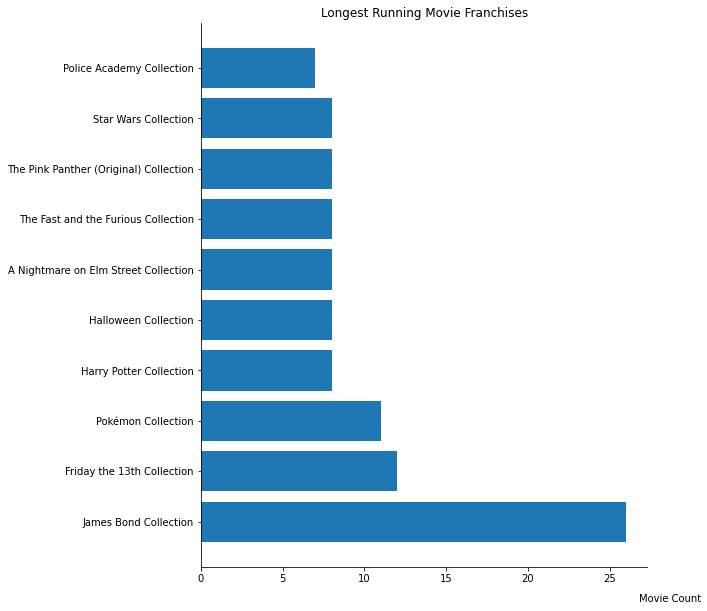

In [33]:
fig, ax = plt.subplots(figsize=(8,10))
plt.barh(longest_franchise['belongs_to_collection'],longest_franchise['count'])

#X-Label
plt.xlabel('Movie Count')
ax.xaxis.set_label_coords(1.05,-0.05)

#Title
plt.title('Longest Running Movie Franchises')

#Remove Spline
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

The James Bond Collection is the longest running movie franchise with 26 total movies in the collection. 

**Highest Revenue Movie Franchise**

In [34]:
highest_revenue = franchise_pivot_table_revenue.sort_values('sum',ascending=False)[:10]

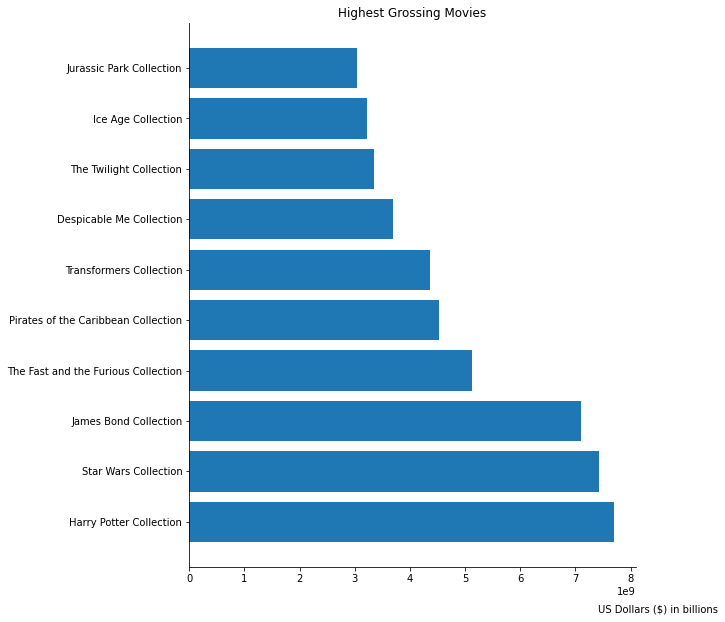

In [35]:
fig, ax = plt.subplots(figsize=(8,10))
plt.barh(highest_revenue['belongs_to_collection'],highest_revenue['sum'])

#X-Label
plt.xlabel('US Dollars ($) in billions')
ax.xaxis.set_label_coords(1.05,-0.07)

#Title
plt.title('Highest Grossing Movies')

#Remove Spline
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

The Harry Potter Collection has collected the most revenue from all other franchises, with a total of 7.7 billion US dollars.

**Highest Average Revenue Movies**

In [36]:
highest_avg_revenue = franchise_pivot_table_revenue.sort_values('mean',ascending=False)[:10]

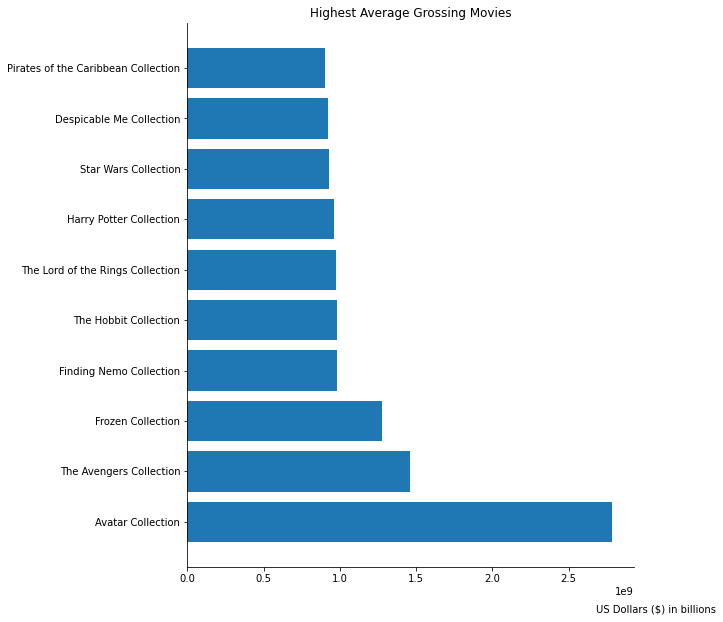

In [37]:
fig, ax = plt.subplots(figsize=(8,10))
plt.barh(highest_avg_revenue['belongs_to_collection'],highest_avg_revenue['mean'])

#X-Label
plt.xlabel('US Dollars ($) in billions')
ax.xaxis.set_label_coords(1.05,-0.07)

#Title
plt.title('Highest Average Grossing Movies')

#Remove Spline
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Harry Potter may be the most successful franchise in terms of revenue, but the Avatar film generated 2.7 billion US Dollars in just one film. 

### Budget

#### Highest Movie Franchise Budgets

In [38]:
franchise_pivot_table_budget = df_franchise.pivot_table(index = 'belongs_to_collection', values = 'budget',
                                                       aggfunc = {'budget':['count','sum','mean']}).reset_index()

In [39]:
highest_franchise_budget = franchise_pivot_table_budget.sort_values('sum',ascending=False)[:10]

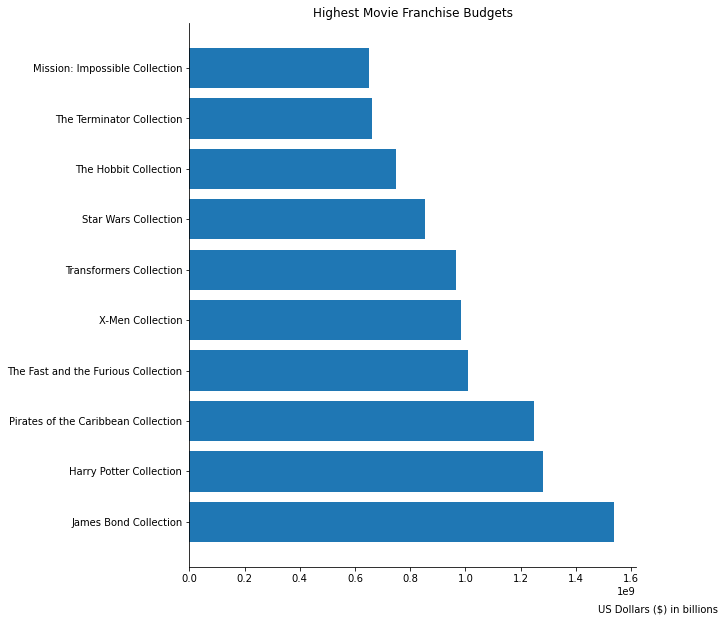

In [40]:
fig, ax = plt.subplots(figsize=(8,10))
plt.barh(highest_franchise_budget['belongs_to_collection'],highest_franchise_budget['sum'])

#X-Label
plt.xlabel('US Dollars ($) in billions')
ax.xaxis.set_label_coords(1.05,-0.07)

#Title
plt.title('Highest Movie Franchise Budgets')

#Remove Spline
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### Highest Budget Movies

In [41]:
df_budget = data[data['budget'].notnull()].copy()

In [42]:
budget_pivot_table = df_budget.pivot_table(index='title', values = 'budget').reset_index()

In [43]:
highest_budget_movies = budget_pivot_table.sort_values('budget',ascending=False)[:10]

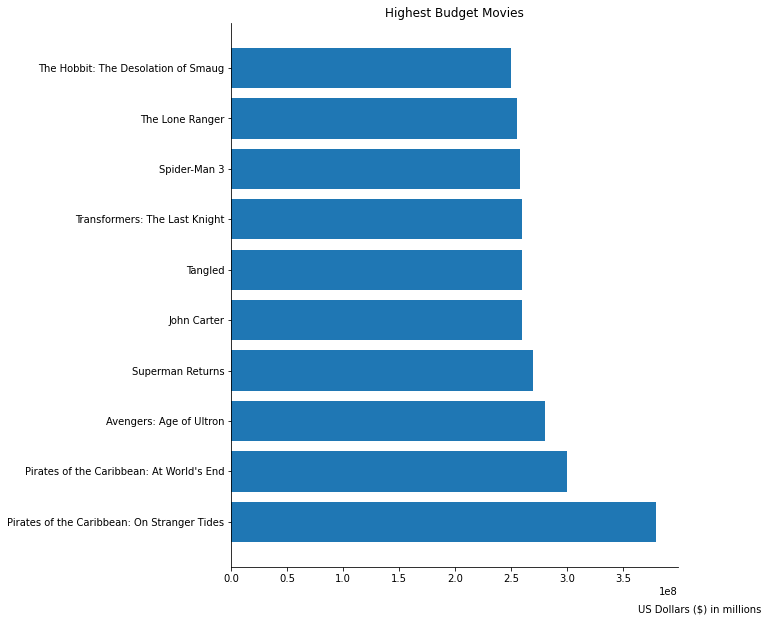

In [44]:
fig, ax = plt.subplots(figsize=(8,10))
plt.barh(highest_budget_movies['title'],highest_budget_movies['budget'])

#X-Label
plt.xlabel('US Dollars ($) in millions')
ax.xaxis.set_label_coords(1.05,-0.07)

#Title
plt.title('Highest Budget Movies')

#Remove Spline
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Production Companies

In [45]:
data.head()

belongs_to_collection      budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1                                                NaN  65000000.0   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         NaN   
3                                                NaN  16000000.0   
4  {'id': 96871, 'name': 'Father of the Bride Col...         NaN   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage original_language  \
0  http://toystory.disney.com/toy-story                en   
1                                   NaN                en   
2                                   NaN                en   
3                                   NaN                en   
4                                   NaN                en   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

                        poster_path  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   
3  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg   
4  /e64sOI48hQXyru7naBFyssKFxVd.jpg   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   

       revenue  runtime                                   spoken_languages  \
0  373554033.0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          NaN    101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0    127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0    106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video  vote_average  vote_count  
0                    Toy Story  False           7.7      5415.0  
1                      Jumanji  False           6.9      2413.0  
2             Grumpier Old Men  False           6.5        92.0  
3            Waiting to Exhale  False           6.1        34.0  
4  Father of the Bride Part II  False           5.7       173.0

In [46]:
df_production_companies = data.copy()
df_production_companies['production_companies'] = df_production_companies['production_companies'].fillna('[]').apply(ast.literal_eval)
df_production_companies['production_companies'] = df_production_companies['production_companies'].apply(
                                                    lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [47]:
stacked_companies = df_production_companies.apply(
        lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)

#Creates a new row for each production company in the list

/var/folders/hg/0r3dxxf938z4yxhyv925kjzr0000gn/T/ipykernel_77870/3779070741.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)


In [48]:
stacked_companies.name = 'company_name'

In [49]:
df_production_companies = df_production_companies.drop('production_companies',axis=1).join(stacked_companies)

In [50]:
df_production_companies['company_name'].head(10)

0                   Pixar Animation Studios
1                          TriStar Pictures
1                              Teitler Film
1                 Interscope Communications
2                              Warner Bros.
2                            Lancaster Gate
3    Twentieth Century Fox Film Corporation
4                     Sandollar Productions
4                       Touchstone Pictures
5                       Regency Enterprises
Name: company_name, dtype: object

In [51]:
#Grouping Production Companies by the sum of their revenue
production_company_sum = pd.DataFrame(df_production_companies.groupby('company_name')['revenue'].sum().sort_values(
ascending=False))
production_company_sum.columns = ['Total_Revenue']

In [52]:
#Grouping Production Companies by the average revenue 
production_company_mean = pd.DataFrame(df_production_companies.groupby('company_name')['revenue'].mean().sort_values(
ascending=False))
production_company_mean.columns = ['Average_Revenue']

In [53]:
#Grouping Production Companies by the number of movies they have produced
production_company_count = pd.DataFrame(df_production_companies.groupby('company_name')['revenue'].count().sort_values(
ascending=False))
production_company_count.columns = ['Movie_Count']

In [54]:
production_company_pivot_table = pd.concat((production_company_sum,production_company_mean,production_company_count)
                                           ,axis=1).reset_index()

In [55]:
production_company_pivot_table

company_name  Total_Revenue  Average_Revenue  \
0                                Warner Bros.   6.352519e+10     1.293792e+08   
1                          Universal Pictures   5.525919e+10     1.193503e+08   
2                          Paramount Pictures   4.880819e+10     1.235650e+08   
3      Twentieth Century Fox Film Corporation   4.768775e+10     1.398468e+08   
4                        Walt Disney Pictures   4.083727e+10     2.778046e+08   
...                                       ...            ...              ...   
23532                              Gädda Five   0.000000e+00              NaN   
23533                            Gávea Filmes   0.000000e+00              NaN   
23534                      Gynormous Pictures   0.000000e+00              NaN   
23535                                    GyaO   0.000000e+00              NaN   
23536                                   프로덕션M   0.000000e+00              NaN   

       Movie_Count  
0              491  
1              463  
2              395  
3              341  
4              147  
...            ...  
23532            0  
23533            0  
23534            0  
23535            0  
23536            0  

[23537 rows x 4 columns]

#### Production Companies with the Highest Revenue

In [56]:
production_company_pivot_table.sort_values('Total_Revenue',ascending=False)[:10]

company_name  Total_Revenue  Average_Revenue  \
0                            Warner Bros.   6.352519e+10     1.293792e+08   
1                      Universal Pictures   5.525919e+10     1.193503e+08   
2                      Paramount Pictures   4.880819e+10     1.235650e+08   
3  Twentieth Century Fox Film Corporation   4.768775e+10     1.398468e+08   
4                    Walt Disney Pictures   4.083727e+10     2.778046e+08   
5                       Columbia Pictures   3.227974e+10     1.367785e+08   
6                         New Line Cinema   2.217339e+10     1.119868e+08   
7                    Amblin Entertainment   1.734372e+10     2.550547e+08   
8                          DreamWorks SKG   1.547575e+10     1.984071e+08   
9                      Dune Entertainment   1.500379e+10     2.419966e+08   

   Movie_Count  
0          491  
1          463  
2          395  
3          341  
4          147  
5          236  
6          198  
7           68  
8           78  
9           62

#### Production Companies with the Highest Average Revenue per Movie

In [57]:
production_company_pivot_table.loc[production_company_pivot_table['Movie_Count'] > 10].sort_values('Average_Revenue',
                                                                                                  ascending=False)[:10] 

company_name  Total_Revenue  Average_Revenue  Movie_Count
18        Pixar Animation Studios   1.118853e+10     6.215852e+08           18
16                 Marvel Studios   1.169964e+10     6.157703e+08           19
28                   Heyday Films   7.920012e+09     6.092317e+08           13
29                  WingNut Films   7.111004e+09     5.470003e+08           13
25         Revolution Sun Studios   8.120339e+09     5.413559e+08           15
41        Fuji Television Network   5.880444e+09     4.900370e+08           12
50               Blue Sky Studios   5.274028e+09     4.794570e+08           11
38  Walt Disney Animation Studios   6.053112e+09     4.656240e+08           13
20                      Lucasfilm   9.898421e+09     4.499282e+08           22
49                      Bad Robot   5.277790e+09     4.398158e+08           12

### Popularity, Average Vote, Vote Count

In [58]:
#Popularity, Average_Vote, Vote_Count
    # Highest average vote
    # Highest Popularity
    # Highest Vote Count    

In [59]:
data.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count'],
      dtype='object')

#### The most popular movies

In [60]:
data['popularity'].describe()

count    45394.000000
mean         2.925726
std          6.008745
min          0.000001
25%          0.388302
50%          1.129954
75%          3.689337
max        547.488298
Name: popularity, dtype: float64

In [61]:
data[['title','release_date','popularity']].sort_values('popularity',ascending=False)[:10]

title release_date  popularity
30700                         Minions   2015-06-17  547.488298
33356                    Wonder Woman   2017-05-30  294.337037
42222            Beauty and the Beast   2017-03-16  287.253654
43644                     Baby Driver   2017-06-28  228.032744
24455                      Big Hero 6   2014-10-24  213.849907
26564                        Deadpool   2016-02-09  187.860492
26566  Guardians of the Galaxy Vol. 2   2017-04-19  185.330992
14551                          Avatar   2009-12-10  185.070892
24351                       John Wick   2014-10-22  183.870374
23675                       Gone Girl   2014-10-01  154.801009

#### The movies with the most number of votes

In [62]:
data['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [63]:
data[['title','release_date','vote_count']].sort_values('vote_count',ascending=False)[:10]

title release_date  vote_count
15480                Inception   2010-07-14     14075.0
12481          The Dark Knight   2008-07-16     12269.0
14551                   Avatar   2009-12-10     12114.0
17818             The Avengers   2012-04-25     12000.0
26564                 Deadpool   2016-02-09     11444.0
22879             Interstellar   2014-11-05     11187.0
20051         Django Unchained   2012-12-25     10297.0
23753  Guardians of the Galaxy   2014-07-30     10014.0
2843                Fight Club   1999-10-15      9678.0
18244         The Hunger Games   2012-03-12      9634.0

#### Movies with the highest average vote

In [64]:
#With more than 200 votes

In [65]:
data.loc[data['vote_count'] > 200,['title','release_date','vote_average']].sort_values('vote_average',ascending=False)[:10]

title release_date  vote_average
10309    Dilwale Dulhania Le Jayenge   1995-10-20           9.1
40251                     Your Name.   2016-08-26           8.5
314         The Shawshank Redemption   1994-09-23           8.5
834                    The Godfather   1972-03-14           8.5
1176                          Psycho   1960-06-16           8.3
44677  Black Mirror: White Christmas   2014-12-16           8.3
2843                      Fight Club   1999-10-15           8.3
2211               Life Is Beautiful   1997-12-20           8.3
1178          The Godfather: Part II   1974-12-20           8.3
292                     Pulp Fiction   1994-09-10           8.3

### Original Language

In [66]:
original_language = pd.DataFrame(data['original_language'].value_counts()).reset_index()

In [67]:
original_language = original_language.rename(columns = {'index':'language','original_language':'count'})

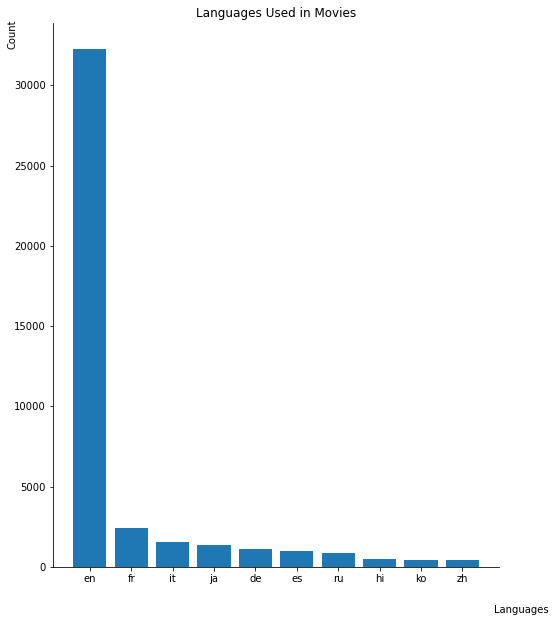

In [68]:
fig, ax = plt.subplots(figsize=(8,10))
plt.bar(original_language['language'][:10],original_language['count'][:10])

#X-Label
plt.xlabel('Languages')
ax.xaxis.set_label_coords(1.05,-0.07)

#Y-Label
plt.ylabel('Count')
ax.yaxis.set_label_coords(-0.08,0.98)

#Title
plt.title('Languages Used in Movies')

#Remove Spline
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

No surpsise English is the most spoken language in all of the movies, as most films are produced in the United States. 

### Production Countries

In [69]:
# Production Countries 
    #Map of different countries 

In [70]:
data['production_countries'][40]

"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [71]:
countries_data = data.copy()
countries_data['production_countries'] = countries_data['production_countries'].fillna('[]').apply(ast.literal_eval)
countries_data['production_countries'] = countries_data['production_countries'].apply(
    lambda x:[i['name'] for i in x] if isinstance(x,list) else [])

In [72]:
countries = countries_data.apply(lambda x : pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1,drop=True)
countries.name = 'countries'

/var/folders/hg/0r3dxxf938z4yxhyv925kjzr0000gn/T/ipykernel_77870/3725129681.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  countries = countries_data.apply(lambda x : pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1,drop=True)


In [73]:
countries_data = countries_data.drop(['production_countries'],axis=1).join(countries)

In [74]:
countries_pivot_table = pd.DataFrame(countries_data['countries'].value_counts()).reset_index()
countries_pivot_table.columns = ['country','movie_count']

In [75]:
df_countries = countries_pivot_table[:10]

In [76]:
df_countries

country  movie_count
0  United States of America        21153
1            United Kingdom         4094
2                    France         3940
3                   Germany         2254
4                     Italy         2169
5                    Canada         1765
6                     Japan         1648
7                     Spain          964
8                    Russia          912
9                     India          828

array([[<AxesSubplot:title={'center':'movie_count'}>]], dtype=object)

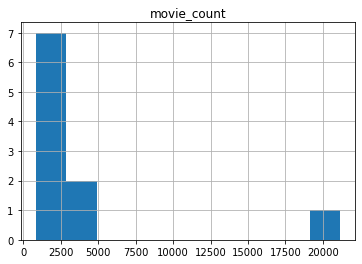

In [77]:
df_countries.hist()

The majority of movies made are made in the United States of America, which makes the most sense as the US is the leading hub in the movie making indsutry. 

In [78]:
#Make chloropleth map of movie_count 
fig = go.Figure(data=go.Choropleth(
    locations = df_countries['country'],
    z = df_countries['movie_count'],
    text = df_countries['country'],
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Movie Count',
    locationmode = 'country names'
))

fig.update_layout(
    title_text='Movie Production of Production Countries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='',
        showarrow = False
    )]
)

fig.show()

To no surpsise, the US is the leading production country in the movie making industry. Followed by the US, it is countries in Europe, such as the UK, France, and Germany. The only country from Asia that made it onto this list is Japan.

#### Release Dates

In [79]:
df_release_dates = data.copy()
df_release_dates = data[['release_date','title']]

In [80]:
df_release_dates = df_release_dates.dropna()

In [81]:
df_release_dates['release_date'] = df_release_dates['release_date'].astype('datetime64[ns]') 

In [82]:
df_release_dates.dtypes

release_date    datetime64[ns]
title                   object
dtype: object

In [83]:
#Getting year, month and day into 3 separate columns from release_date
df_release_dates['year'] = pd.DatetimeIndex(df_release_dates['release_date']).year
df_release_dates['month'] = pd.DatetimeIndex(df_release_dates['release_date']).month
df_release_dates['day'] = pd.DatetimeIndex(df_release_dates['release_date']).day
df_release_dates = df_release_dates.drop('release_date',axis=1)

In [84]:
df_release_dates

title  year  month  day
0                        Toy Story  1995     10   30
1                          Jumanji  1995     12   15
2                 Grumpier Old Men  1995     12   22
3                Waiting to Exhale  1995     12   22
4      Father of the Bride Part II  1995      2   10
...                            ...   ...    ...  ...
45460                   Robin Hood  1991      5   13
45462          Century of Birthing  2011     11   17
45463                     Betrayal  2003      8    1
45464             Satan Triumphant  1917     10   21
45465                     Queerama  2017      6    9

[45376 rows x 4 columns]

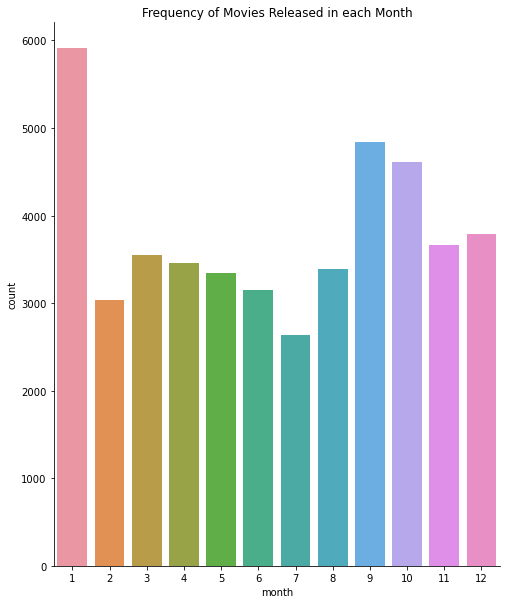

In [85]:
#Frequency of movies Released every month 
month_order = range(1,13)

ax, fig = plt.subplots(figsize=(8,10))
sns.countplot(x='month', data=df_release_dates, order=month_order).set(title='Frequency of Movies Released in each Month')
sns.despine(right=True)
plt.show()

In [86]:
year_count = df_release_dates.groupby('year')['title'].count()

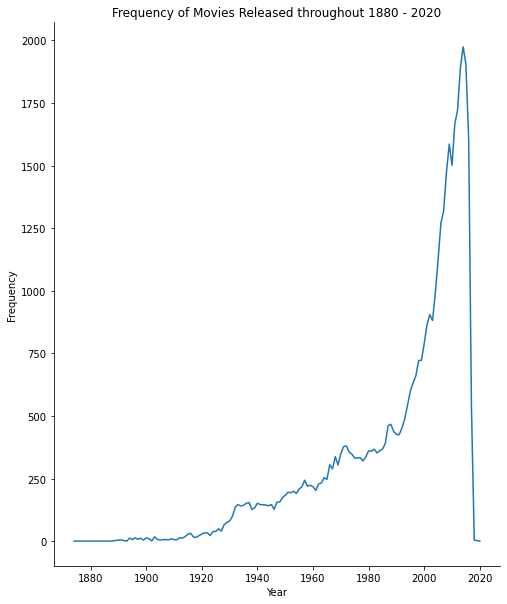

In [87]:
#Frequency of movies released every day 
ax, fig = plt.subplots(figsize=(8,10))
plot = sns.lineplot(data=year_count)
plot.set_ylabel('Frequency')
plot.set_xlabel('Year')
plot.set_title('Frequency of Movies Released throughout 1880 - 2020')
sns.despine(right=True)
plt.show()

#### Status

In [88]:
data['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

Not sure why they would have categories of anything else apart for Released movies. 

#### Languages Spoken

In [89]:
df_language = data.copy()

In [90]:
df_language['spoken_languages'] = data['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(
                    lambda x: len(x) if isinstance(x,list) else np.nan)

In [91]:
df_language['spoken_languages'].value_counts()

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
10        1
12        1
19        1
13        1
Name: spoken_languages, dtype: int64

Most movies have only 1 language spoken in them, but there is one movie in which 19 languages are spoken. 

In [92]:
df_language.loc[df_language['spoken_languages'] >= 10, ['title','spoken_languages']]

title  spoken_languages
8789   The Adventures of Picasso                10
14093     To Each His Own Cinema                12
22235          Visions of Europe                19
35288             The Testaments                13

#### Runtime

In [93]:
runtime_df = data.copy()
runtime_df = data.loc[data['runtime'].notnull()]

In [94]:
runtime_df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

The average length of a movie is 94 minutes, which is the standard for most movies being 1 hour and 30 minutes long. While the longest movie is 1256 minutes long. 

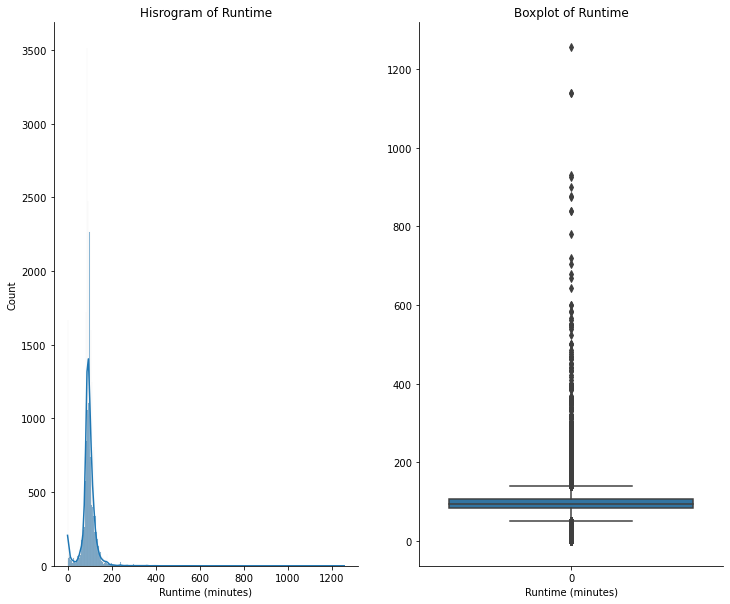

In [95]:
fig, axes = plt.subplots(1,2,figsize=(12,10))

#Plot 1 
p1 = sns.histplot(data = runtime_df['runtime'],kde=True, ax = axes[0])
p1.set_title('Hisrogram of Runtime')
p1.set_xlabel('Runtime (minutes)')
sns.despine(right = True)

#Plot 2 
p2 = sns.boxplot(data = runtime_df['runtime'], ax = axes[1])
p2.set_title('Boxplot of Runtime')
p2.set_xlabel('Runtime (minutes)')
sns.despine(right = True)

plt.show()

Most movie runtimes fall in between 0 and 200 minutes.

In [96]:
#Looking at the movies 
runtime_df.loc[runtime_df['runtime'] > 1200]

belongs_to_collection  budget  \
24178                   NaN     NaN   

                                                  genres homepage  \
24178  [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...      NaN   

      original_language                                           overview  \
24178                en  The economic and cultural growth of Colorado s...   

       popularity                       poster_path  \
24178    0.664727  /AoEgJrDVkzlgWugcaTxI03FiUXf.jpg   

                                  production_companies  \
24178  [{'name': 'Universal Television', 'id': 26727}]   

                                    production_countries release_date  \
24178  [{'iso_3166_1': 'US', 'name': 'United States o...   1978-10-01   

       revenue  runtime spoken_languages    status tagline       title  video  \
24178      NaN   1256.0               []  Released     NaN  Centennial  False   

       vote_average  vote_count  
24178           7.9         8.0

I believe the movies that have a runtime of over 250 minutes may be TV shows that have been collected as one single film. The longest film **Centennial** has a runtime of 1256 minutes, which is over 20 hours long. 

In [97]:
correct_runtime = runtime_df.loc[(runtime_df['runtime'] < 250) & (runtime_df['runtime'] > 0)]['runtime']

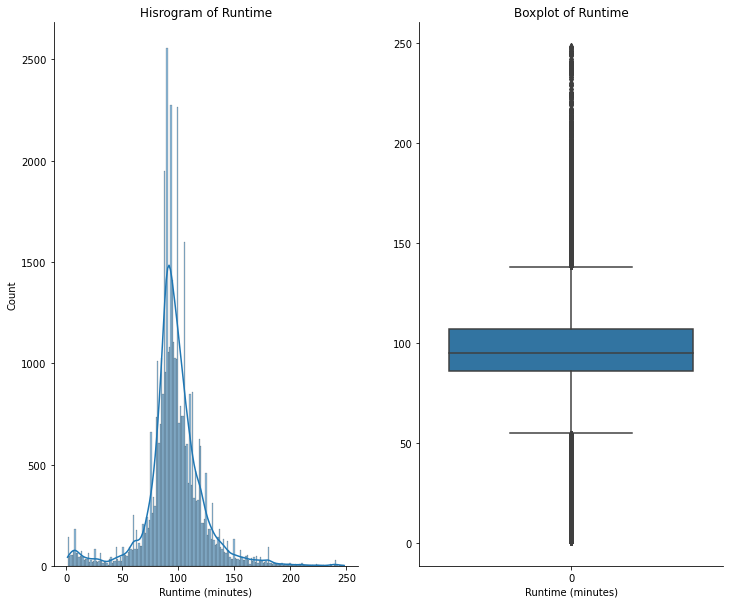

In [98]:
#Using runtime of 0 to 250 
fig, axes = plt.subplots(1,2,figsize=(12,10))

#Plot 1 
p1 = sns.histplot(data = correct_runtime,kde=True, ax = axes[0])
p1.set_title('Hisrogram of Runtime')
p1.set_xlabel('Runtime (minutes)')
sns.despine(right = True)

#Plot 2 
p2 = sns.boxplot(data = correct_runtime, ax = axes[1])
p2.set_title('Boxplot of Runtime')
p2.set_xlabel('Runtime (minutes)')
sns.despine(right = True)

plt.show()

### Genres

In [99]:
data['genres'][20]

"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'name': 'Thriller'}, {'id': 80, 'name': 'Crime'}]"

In [100]:
genres_data = data.copy()
genres_data['genres'] = genres_data['genres'].fillna('[]').apply(ast.literal_eval)
genres_data['genres'] = genres_data['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [101]:
stacked_genres = genres_data.apply(lambda x: pd.Series(x['genres']), axis =1).stack().reset_index(level=1,drop=True)
stacked_genres.name = 'genre'

/var/folders/hg/0r3dxxf938z4yxhyv925kjzr0000gn/T/ipykernel_77870/2419813793.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [102]:
genres_data = genres_data.drop(['genres'],axis=1).join(stacked_genres)

In [103]:
#Genre Sum in terms of revenue
genre_sum = pd.DataFrame(genres_data.groupby(['genre'])['revenue'].sum()).sort_values('revenue',ascending=False)
genre_sum.columns = ['total']

#Genre Average in terms of revenue
genre_mean = pd.DataFrame(genres_data.groupby(['genre'])['revenue'].mean()).sort_values('revenue',ascending=False)
genre_mean.columns = ['average']

#Genre count
genre_count = pd.DataFrame(genres_data.groupby(['genre'])['revenue'].count()).sort_values('revenue',ascending=False)
genre_count.columns = ['count']

genre_pivot_table = pd.concat([genre_sum,genre_mean,genre_count], axis=1).reset_index()

#### Movie Frequency for Each Genre

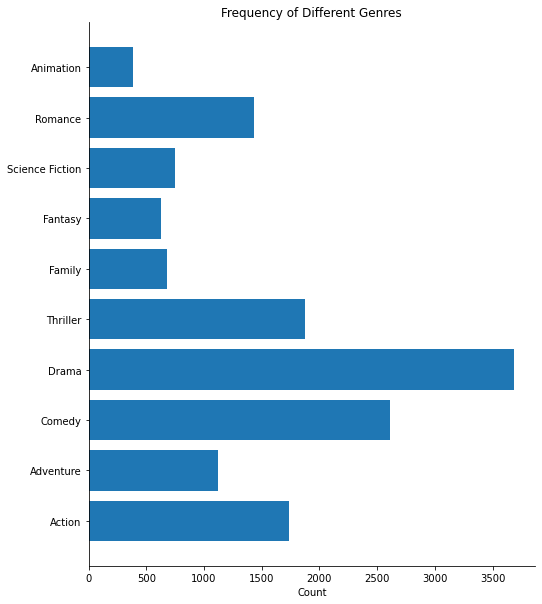

In [104]:
fig, ax = plt.subplots(figsize = (8,10))
plt.barh(genre_pivot_table['genre'][:10],genre_pivot_table['count'][:10])

#X-Axis
ax.set_xlabel('Count')

#Title
ax.set_title('Frequency of Different Genres')

#Removing Spines
ax.spines[['top','right']].set_visible(False)
plt.show()

**Drama** is by far the most popular type of genre with more than 3500 films made for this style, followed by **Comedy** and **Thriller**. 

#### Total Revenue of Different Genres

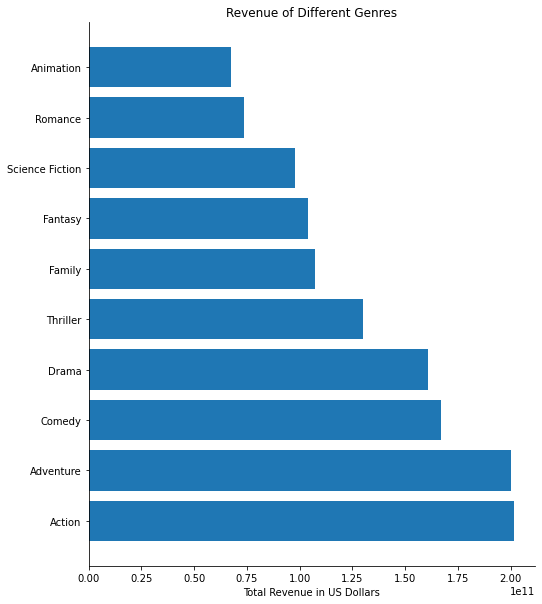

In [105]:
fig, ax = plt.subplots(figsize = (8,10))
plt.barh(genre_pivot_table['genre'][:10],genre_pivot_table['total'][:10])

#X-Axis
ax.set_xlabel('Total Revenue in US Dollars')

#Title
ax.set_title('Revenue of Different Genres')

#Removing Spines
ax.spines[['top','right']].set_visible(False)
plt.show()

**Action** and **Adventure** movies are the highest revenue generating genres. With both genres generating a revenue of more than 20 billion US dollars. The third most successful genre is **Comedy**, generating roughly 16 billion US dollars. 

#### Average Revenue for Different Genres

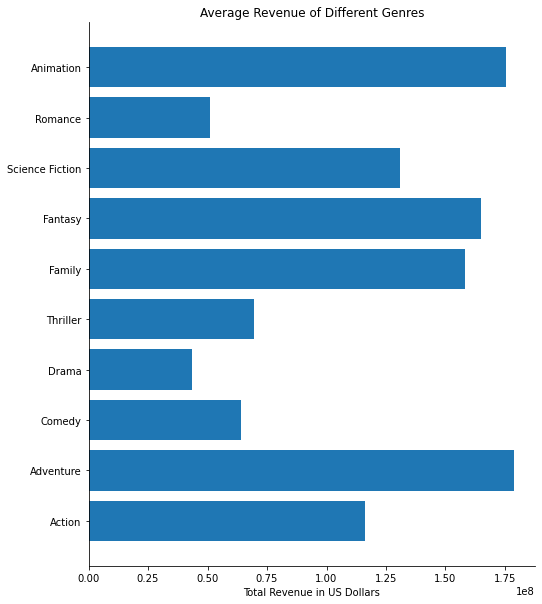

In [106]:
fig, ax = plt.subplots(figsize = (8,10))
plt.barh(genre_pivot_table['genre'][:10],genre_pivot_table['average'][:10])

#X-Axis
ax.set_xlabel('Total Revenue in US Dollars')

#Title
ax.set_title('Average Revenue of Different Genres')

#Removing Spines
ax.spines[['top','right']].set_visible(False)
plt.show()

Per movie, the **Action** genre generates the most amount of revenue for a single film followed by **Animation** then **Fantasy**.

### Title & Overview

In [107]:
data[['title','overview']]

title  \
0                        Toy Story   
1                          Jumanji   
2                 Grumpier Old Men   
3                Waiting to Exhale   
4      Father of the Bride Part II   
...                            ...   
45461                       Subdue   
45462          Century of Birthing   
45463                     Betrayal   
45464             Satan Triumphant   
45465                     Queerama   

                                                overview  
0      Led by Woody, Andy's toys live happily in his ...  
1      When siblings Judy and Peter discover an encha...  
2      A family wedding reignites the ancient feud be...  
3      Cheated on, mistreated and stepped on, the wom...  
4      Just when George Banks has recovered from his ...  
...                                                  ...  
45461        Rising and falling between a man and woman.  
45462  An artist struggles to finish his work while a...  
45463  When one of her hits goes wrong, a professiona...  
45464  In a small town live two brothers, one a minis...  
45465  50 years after decriminalisation of homosexual...  

[45466 rows x 2 columns]

In [108]:
word_cloud_df = data.copy()
word_cloud_df['title'] = word_cloud_df['title'].astype('str')
word_cloud_df['overview'] = word_cloud_df['overview'].astype('str')

In [109]:
title_words = ''.join(word_cloud_df['title'])
overview_words = ''.join(word_cloud_df['overview'])

#### WordCloud of Words in Title

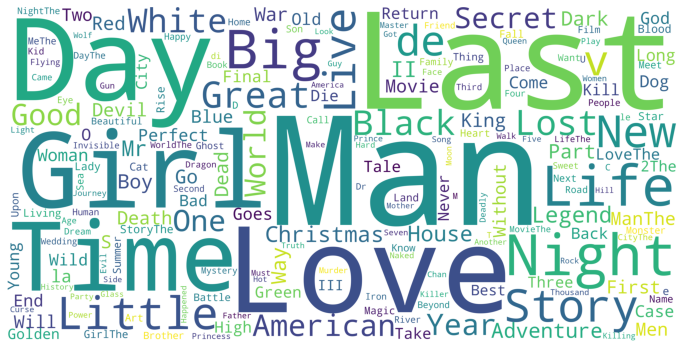

In [110]:
title_cloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=4000,height=2000).generate(title_words)
plt.figure(figsize=(12,10))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

The most common words used in titles are **Love**, **Last**, **Man**, **Girl**, **Day**. 

#### WordCloud of Words in Overview

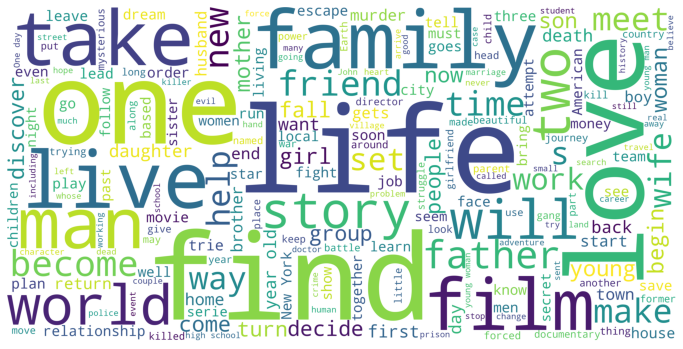

In [111]:
overview_cloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=4000,height=2000).generate(overview_words)
plt.figure(figsize=(12,10))
plt.imshow(overview_cloud)
plt.axis('off')
plt.show()

The most common words in the overview are **find**, **love**, and **life**. 

Both the title and overview have the common word **Love**, which shows the presence of romance in many films. 

## Cleaning Data

### Removing / Imputing Null Values

In [112]:
data.isna().sum()

belongs_to_collection    40972
budget                   36576
genres                       0
homepage                 37684
original_language           11
overview                   954
popularity                  72
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                  38058
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [113]:
# Drop columns tagline, video, status, poster_path
data = data.drop(['tagline','video','status','poster_path'],axis = 1)

In [114]:
#Impute Values and Dropping Rows with Null Values

# popularity --> immpute with mean
data['popularity'] = data['popularity'].fillna(data['popularity'].mean())

# runtime --> impute with mean 
data['runtime'] = data['runtime'].fillna(data['runtime'].mean())

# budget --> impute with mean 
# data['budget'] = data['budget'].fillna(data['budget'].mean())

# revenue --> impute with mean
# data['revenue'] = data['revenue'].fillna(data['revenue'].mean())

# Dropping Missing Values in Rows
data = data.dropna(subset=['release_date','original_language','title','vote_average','vote_count',
                          'production_countries','production_companies','budget','revenue'],axis=0)

## Feature Engineering

#### Processing on Overview Feature

In [115]:
data['overview'][10]

"Widowed U.S. president Andrew Shepherd, one of the world's most powerful men, can have anything he wants -- and what he covets most is Sydney Ellen Wade, a Washington lobbyist. But Shepherd's attempts at courting her spark wild rumors and decimate his approval ratings."

In [116]:
#Creating a set of stopwords
stop_words = set(stopwords.words('english'))

#Removing Stopwords from Overview
data['overview'] = data['overview'].astype(str)
data['clean_overview'] = data['overview'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [117]:
#Creating Snowball Stemmer 
snow_ball = SnowballStemmer('english')

#Removing Word Stems
data['clean_overview'] = data['clean_overview'].apply(lambda x: " ".join(snow_ball.stem(word) for word in x.split()))

In [118]:
data['clean_overview'][10]

'widow u.s. presid andrew shepherd, one world power men, anyth want -- covet sydney ellen wade, washington lobbyist. but shepherd attempt court spark wild rumor decim approv ratings.'

#### Helper Functions : 

In [119]:
# Helper Functions to get Year, Month and Day of the Week
def get_year(release_date):
    try : 
        return int(release_date.split('-')[0])
            
    except :
        return np.nan
    
def get_month(release_date):
    try : 
        return int(release_date.split('-')[1])
    
    except:
        return np.nan
    
def get_weekday(release_date):
    try : 
        year, month, day = [int(i) for i in release_date.split('-')]
        day_of_week = date(year, month, day).weekday()
        day_order = range(1,8) #1 : Monday, ..., 7 : Sunday
        return day_order[day_of_week]
    
    except :
        return np.nan

#### Preprocess Function

In [120]:
def preprocess(df) : 
    feature_df = df.copy()
    
    # collection Feature 
    feature_df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x : 0 if x is np.nan else 1)
    
    # home_page 
    feature_df['homepage'] = df['homepage'].apply(lambda x : 0 if x is np.nan else 1)
    
    # Length of Production Companies
    feature_df['production_companies'] = feature_df['production_companies'].fillna('[]').apply(ast.literal_eval)
    feature_df['production_companies'] = feature_df['production_companies'].apply(
                                    lambda x: [i['name'] for i in x] if isinstance(x,list) else [])
    feature_df['num_production_companies'] = feature_df['production_companies'].apply(lambda x: len(x))
    
    # Length of Production Countries 
    feature_df['production_countries'] = feature_df['production_countries'].fillna('[]').apply(ast.literal_eval)
    feature_df['production_countries'] = feature_df['production_countries'].apply(
                                    lambda x: [i['name'] for i in x] if isinstance(x,list) else [])
    feature_df['num_production_countries'] = feature_df['production_countries'].apply(lambda x: len(x))
    
    # Length of Spoken Languages
    feature_df['spoken_languages'] = feature_df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
    feature_df['spoken_languages'] = feature_df['spoken_languages'].apply(
                                    lambda x: [i['name'] for i in x] if isinstance(x,list) else [])
    feature_df['num_spoken_languages'] = feature_df['spoken_languages'].apply(lambda x: len(x))
    
    # Length of Genres
    feature_df['genres'] = feature_df['genres'].fillna('[]').apply(ast.literal_eval)
    feature_df['genres'] = feature_df['genres'].apply(
                                    lambda x: [i['name'] for i in x] if isinstance(x,list) else [])
    feature_df['num_genres'] = feature_df['genres'].apply(lambda x: len(x))
    
    # Label Encode Original Language 
    le = LabelEncoder()
    feature_df['encoded_original_language'] = le.fit_transform(feature_df['original_language'])
    
    #Release Date
    feature_df['year'] = feature_df['release_date'].apply(get_year)
    feature_df['month'] = feature_df['release_date'].apply(get_month)
    feature_df['day_of_week'] = feature_df['release_date'].apply(get_weekday)
    
    #Length of Words in Title
    feature_df['len_title'] = feature_df['title'].apply(lambda x: len(x.split(" ")))
    
    #Length of Words in Overview
    feature_df['len_overview'] = feature_df['clean_overview'].apply(lambda x: len(x.split(" ")))
    
    #Length of Unique Words in Overview 
    feature_df['len_unique_words_overview'] = feature_df['clean_overview'].apply(lambda x : len(set(x.split(" "))))
    
    #Count of Stopwords in Overview
    feature_df['count_stopwords'] = feature_df['overview'].apply(lambda x: 
                                                            len([word for word in x.split() if word in stop_words]))
            
    #Is movie is a flop : Revenue < Budget --> 1 is flop
    feature_df['flop'] = np.where(feature_df['revenue'] < feature_df['budget'],1,0)
    
    #Convert Budget into Millions
    feature_df['budget'] = round(feature_df['budget'] / 1_000_000,2)
    
    #Convert Revenue into Millions
    feature_df['revenue'] = round(feature_df['revenue'] / 1_000_000,2)
        
    #Dropping features
    feature_df = feature_df.drop(['title','overview','clean_overview','production_companies',
                                 'production_countries','spoken_languages','genres','original_language',
                                 'release_date'],axis = 1) 
    
    return feature_df

In [121]:
clean_df = preprocess(data)

In [122]:
clean_df.head().T

0            1            3            5  \
belongs_to_collection         1.000000     0.000000     0.000000     0.000000   
budget                       30.000000    65.000000    16.000000    60.000000   
homepage                      1.000000     0.000000     0.000000     0.000000   
popularity                   21.946943    17.015539     3.859495    17.924927   
revenue                     373.550000   262.800000    81.450000   187.440000   
runtime                      81.000000   104.000000   127.000000   170.000000   
vote_average                  7.700000     6.900000     6.100000     7.700000   
vote_count                 5415.000000  2413.000000    34.000000  1886.000000   
num_production_companies      1.000000     3.000000     1.000000     3.000000   
num_production_countries      1.000000     1.000000     1.000000     1.000000   
num_spoken_languages          1.000000     2.000000     1.000000     2.000000   
num_genres                    3.000000     3.000000     3.000000     4.000000   
encoded_original_language     7.000000     7.000000     7.000000     7.000000   
year                       1995.000000  1995.000000  1995.000000  1995.000000   
month                        10.000000    12.000000    12.000000    12.000000   
day_of_week                   1.000000     5.000000     5.000000     5.000000   
len_title                     2.000000     1.000000     3.000000     1.000000   
len_overview                 34.000000    42.000000    29.000000    36.000000   
len_unique_words_overview    30.000000    39.000000    28.000000    36.000000   
count_stopwords              16.000000    25.000000    16.000000    16.000000   
flop                          0.000000     0.000000     0.000000     0.000000   

                                    8  
belongs_to_collection         0.00000  
budget                       35.00000  
homepage                      0.00000  
popularity                    5.23158  
revenue                      64.35000  
runtime                     106.00000  
vote_average                  5.50000  
vote_count                  174.00000  
num_production_companies      3.00000  
num_production_countries      1.00000  
num_spoken_languages          1.00000  
num_genres                    3.00000  
encoded_original_language     7.00000  
year                       1995.00000  
month                        12.00000  
day_of_week                   5.00000  
len_title                     2.00000  
len_overview                 48.00000  
len_unique_words_overview    43.00000  
count_stopwords              22.00000  
flop                          0.00000

<AxesSubplot:>

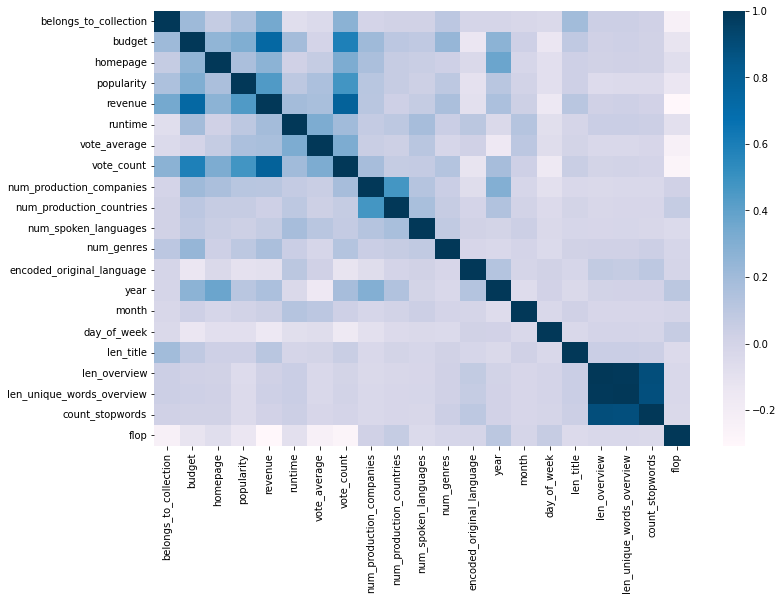

In [123]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(clean_df.corr(),cmap='PuBu')

## Regression 

Predict **`revenue`** of a movie. 

In [124]:
#Features 
X = clean_df.drop('revenue',axis=1)

#Target Variable
y = clean_df['revenue']

In [125]:
#Splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [126]:
print('Shape of X_train : ', X_train.shape)
print('Length of y_train : ', y_train.shape[0])
print('--------------------------')
print('Shape of X_test : ', X_test.shape)
print('Length of y_test : ', y_test.shape[0])

Shape of X_train :  (4035, 20)
Length of y_train :  4035
--------------------------
Shape of X_test :  (1346, 20)
Length of y_test :  1346


#### Linear Regression

In [127]:
regression_clf = LinearRegression()
regression_clf.fit(X_train, y_train)
print('R\u00b2:',regression_clf.score(X_test,y_test))

R²: 0.7169408209204204


In [128]:
#Predicting Values
y_pred_reg = regression_clf.predict(X_test)
y_pred_reg = [round(i,3) for i in y_pred_reg]

The residual plot has a random pattern which supports a linear model.

#### Ridge Regression

In [129]:
ridge_clf = Ridge(alpha = 10, solver = 'auto')
ridge_clf.fit(X_train, y_train)
print('R\u00b2:',ridge_clf.score(X_test,y_test))

R²: 0.7167494280437869


In [130]:
y_pred_ridge = ridge_clf.predict(X_test)
y_pred_ridge = [round(i,3) for i in y_pred_ridge]

#### Lasso Regression

In [131]:
lasso_clf = Lasso(alpha = 10)
lasso_clf.fit(X_train, y_train)
print('R\u00b2:',lasso_clf.score(X_test,y_test))

R²: 0.6840472700432358


In [132]:
y_pred_lasso = lasso_clf.predict(X_test)
y_pred_lasso = [round(i,3) for i in y_pred_ridge]

The model with the best $R^2$ value is the Linear Regression model without any Regularization. While the model with the lowest $R^2$ value is the Lasso Regression model. Therefore, the Linear Regression model is a better predictive model compared to the other two models. 

#### Residual Plot

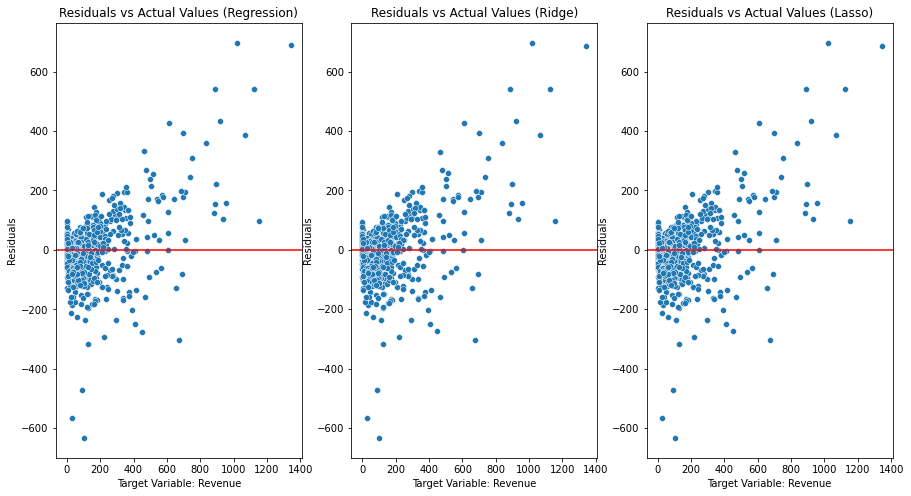

In [133]:
#Residual vs Actual Scatter Plot
fig, axes = plt.subplots(1,3,figsize=(15,8))

residuals_reg = y_test - y_pred_reg
residuals_ridge = y_test - y_pred_ridge
residuals_lasso = y_test - y_pred_lasso

#Plot 1
p1 = sns.scatterplot(x = y_test,y = residuals_reg,ax = axes[0])
p1.set_xlabel('Target Variable: Revenue')
p1.set_ylabel('Residuals')
p1.set_title('Residuals vs Actual Values (Regression)')
p1.axhline(y=0.0, color='r', linestyle='-')

#Plot 2
p2 = sns.scatterplot(x = y_test,y = residuals_ridge,ax = axes[1])
p2.set_xlabel('Target Variable: Revenue')
p2.set_ylabel('Residuals')
p2.set_title('Residuals vs Actual Values (Ridge)')
p2.axhline(y=0.0, color='r', linestyle='-')

#Plot 3
p3 = sns.scatterplot(x = y_test,y = residuals_lasso,ax = axes[2])
p3.set_xlabel('Target Variable: Revenue')
p3.set_ylabel('Residuals')
p3.set_title('Residuals vs Actual Values (Lasso)')
p3.axhline(y=0.0, color='r', linestyle='-')

plt.show()

#### GradientBoosting Regression 

In [134]:
gradBoost_reg = GradientBoostingRegressor()
gradBoost_reg.fit(X_train,y_train)
print('R\u00b2: ',gradBoost_reg.score(X_test,y_test))

R²:  0.7797132114120611


<AxesSubplot:>

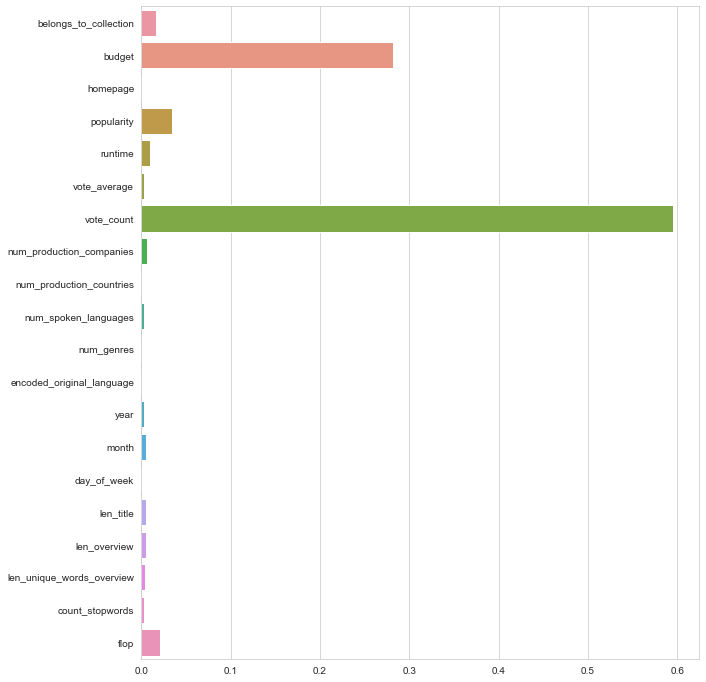

In [135]:
#Feature Importance
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=gradBoost_reg.feature_importances_, y=X.columns)

Here we can see that the **`vote_count`** is the most important feature, a metric similar to measuring populairty, which means that the amount of people voting is a large determining factor in predicting revenue. Then we have **`budget`** followed by **`popularity`**. 

#### XgBoost Regressor

In [136]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train,y_train)
print('R\u00b2: ', xgb_reg.score(X_test,y_test))

R²:  0.7683962512284082


<AxesSubplot:>

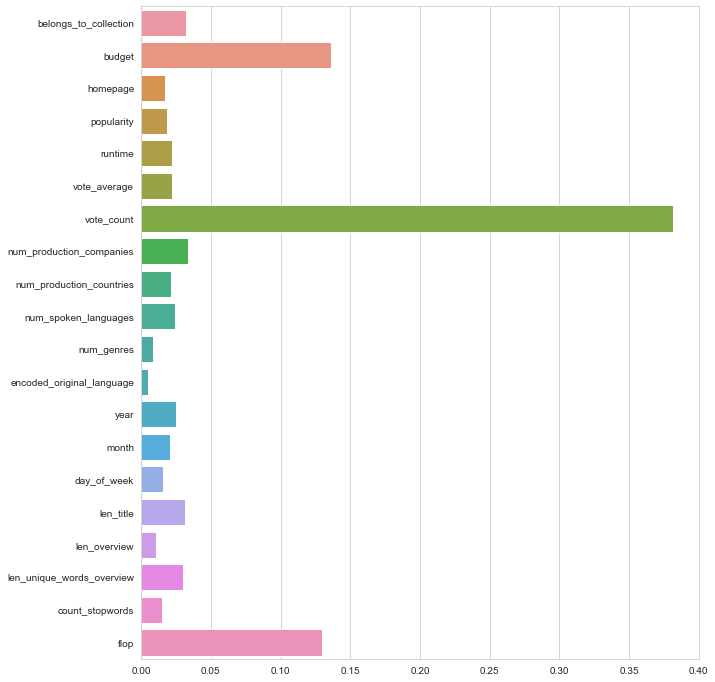

In [137]:
#Feature Importance
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=xgb_reg.feature_importances_, y=X.columns)

We see similar results here as we do from the Gradient Boosting Classifier, as **`vote_count`** and **`budget`** are the most important features. However, the XGBoost Classifier finds that **`belongs_to_collection`** is the next most important feature rather than **`popularity`**. Moreover, the XGBoost Classifier finds more of the features as important. 

The **Gradient Boosting Classifier** has the highest $R^2$ value while the **Lasso Regression** has the lowest $R^2$ value. 